# Prediction of forest fire in Portugal

Through a regression model, we will predict the damaged areas by forest fire on a  region of Portugal. The prediction consist on whether a forest fire can be affected by a fire, and if it is, how many hectareas can be the fire affect.


## 1. Data

The data is downloaded from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Forest+Fires
Data Set Information:

#### Prior results
In [Cortez and Morais, 2007], the output 'area' was first transformed with a ln(x+1) function. Then, several Data Mining methods were applied. After fitting the models, the outputs were post-processed with the inverse of the ln(x+1) transform. Four different input setups were used. The experiments were conducted using a 10-fold (cross-validation) x 30 runs. Two regression metrics were measured: MAD and RMSE. A Gaussian support vector machine (SVM) fed with only 4 direct weather conditions (temp, RH, wind and rain) obtained the best MAD value: 12.71 +- 0.01 (mean and confidence interval within 95% using a t-student distribution). The best RMSE was attained by the naive mean predictor. An analysis to the regression error curve (REC) shows that the SVM model predicts more examples within a lower admitted error. In effect, the SVM model predicts better small fires, which are the majority. 

### Features

1. `X `- x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. `Y `- y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. `month` - month of the year: 'jan' to 'dec'
4. `day` - day of the week: 'mon' to 'sun'
5. `FFMC` - FFMC (Fine Fuel Moisture Code) index from the FWI system: 18.7 to 96.20
6. `DMC` - DMC (Dufe moisture Code) index from the FWI system: 1.1 to 291.3
7. `DC` - DC (Drought Code) index from the FWI (Fire Weather Index) system: 7.9 to 860.6
8. `ISI` - ISI (Initial Spread Index) index from the FWI system: 0.0 to 56.10
9. `temp` - temperature in Celsius degrees: 2.2 to 33.30
10. `RH` - relative humidity in %: 15.0 to 100
11. `wind` - wind speed in km/h: 0.40 to 9.40
12. `rain` - outside rain in mm/m2 : 0.0 to 6.4
13. `area` - the burned area of the forest (in ha): 0.00 to 1090.84 

`FFMC`: Denotes the moisture content surface litter and influences ignition and fire spread. 

`DMC and DC`: Represent the moisture content of shallow and deep organic layers, which affect fire intensity.

`ISI`: Score that correlates with fire velocity spread.

### Objectives

We will build a regression model able to predict the burned area by forest fire according with the above features. As we have pre processed different dataset through statistical analysis, We will proceed to use some of them to develop the most possible efficient model. In this notebook we will use support machine Regression (SVR).

In [19]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Transforming categorical data month into numbers
def cat_trans(X):
    X['month'] = X['month'].replace('jan', 1)
    X['month'] = X['month'].replace('feb', 2)
    X['month'] = X['month'].replace('mar', 3)
    X['month'] = X['month'].replace('apr', 4)
    X['month'] = X['month'].replace('may', 5)
    X['month'] = X['month'].replace('jun', 6)
    X['month'] = X['month'].replace('jul', 7)
    X['month'] = X['month'].replace('aug', 8)
    X['month'] = X['month'].replace('sep', 9)
    X['month'] = X['month'].replace('oct', 10)
    X['month'] = X['month'].replace('nov', 11)
    X['month'] = X['month'].replace('dec', 12)
    return X

## 1. Using the original dataset

In [10]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
data = pd.read_csv('forestfires.csv')

data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [11]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


#### Summary

We notice that area has a mean of 12.84742 ha and has a maximum of 1090 and minimum of 0.

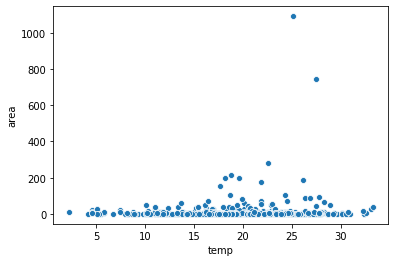

In [12]:
sns.scatterplot(data.temp, data.area)

#### Analysis

We can notice area has a few outliers very distant from the group. That will probably affect our model, let's see the results. To minimize their effect we will scale the data.

### Model

In [46]:
np.random.seed(42)

data.drop(['ISI', 'wind', 'rain', 'day', 'X', 'Y'], axis=1, inplace=True)


X = data.drop('area', axis=1)
y = data['area']

X = cat_trans(X)

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scaling the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.fit_transform(y_test)

# Fitting the model
model.fit(X_train_scaled, y_train_scaled)

# Making predictions
pred = model.predict(X_test_scaled)

pred_u = scaler.inverse_transform(np.array(pred).reshape(-1, 1))
y_test_u = scaler.inverse_transform(np.array(y_test_scaled).reshape(-1, 1))
diff = np.array(pred_u) - np.array(y_test_u)
summary_diff = pd.DataFrame(np.concatenate((pred_u, y_test_u, diff), axis=1), columns=["Predictions", "Real", "Difference"])



print(
"R2 square: ", r2_score(y_test_scaled, pred), " Mean Absolute Error: ", mean_absolute_error(y_test_scaled, pred),
    " Mean Squared Error: ", mean_squared_error(y_test_scaled, pred), 
 )

KeyError: "['ISI' 'wind' 'rain' 'day' 'X' 'Y'] not found in axis"

In [16]:
# calculating the mean of the scaled y_test data and the prediction
np.mean(y_test_scaled), np.mean(pred)

(0.015284833424065575, 0.013001908815041954)

#### Evaluating the unscaled prediction with the real label test:

In [17]:
r2_score(y_test, pred_u), mean_absolute_error(y_test, pred_u), mean_squared_error(y_test, pred_u)

(-0.14120156378450055, 23.56067200519237, 10811.96030732931)

### Analysis of Results

We can see a huge improvement when using Decision Tree compared to Support Vector Machine. In SVR we obtained a MAE around 100, in Decision Tree we get a value of 23. This is still a very big value to count as an effective model but we have to take into account the two outliers that skew our dataset.

We will tune the hyperparameters of our model and test if we can obtain better results.

#### Tuning

In [20]:
# Different Support Vector Regressor hyperparameter
rf_grid = {"criterion":["mse", "friedman_mse", "mae"],
          "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_samples_split":[2,3,4,5,6,7,8],
           "max_features":["auto", "sqrt", "log2"]

          }  # limiting the maximum to save time

# Instantiate RandomizedSearchCV model
tree_model = RandomizedSearchCV(model,
                              param_distributions=rf_grid,
                              n_iter = 100, 
                              cv=20,
                              verbose=True
                             )
# Fit the RandomizedSearchCV model
tree_model.fit(X_train_scaled, y_train_scaled)

#print(tree_model.best_params_)
tree_model.best_params_

Fitting 20 folds for each of 100 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    9.3s finished


{'min_samples_split': 2,
 'min_samples_leaf': 7,
 'max_features': 'sqrt',
 'criterion': 'mae'}

#### Trying the best model

In [33]:
model = DecisionTreeRegressor(min_samples_split=2, min_samples_leaf=7, max_features='log2', criterion='mae')
# Fitting the model
model.fit(X_train_scaled, y_train_scaled)

# Making predictions
pred = model.predict(X_test_scaled)

pred_u = scaler.inverse_transform(np.array(pred).reshape(-1, 1))
y_test_u = scaler.inverse_transform(np.array(y_test_scaled).reshape(-1, 1))
diff = np.array(pred_u) - np.array(y_test_u)
summary_diff = pd.DataFrame(np.concatenate((pred_u, y_test_u, diff), axis=1), columns=["Predictions", "Real", "Difference"])

print(
"R2 square: ", r2_score(y_test_scaled, pred), " Mean Absolute Error: ", mean_absolute_error(y_test_scaled, pred),
    " Mean Squared Error: ", mean_squared_error(y_test_scaled, pred), 
 )

R2 square:  -0.025568665595493423  Mean Absolute Error:  0.015769125571968197  Mean Squared Error:  0.008165536387179664


#### Evaluating the unscaled y_test and pred with the tuned model

In [35]:
r2_score(y_test, pred_u), mean_absolute_error(y_test, pred_u), mean_squared_error(y_test, pred_u)

(-0.025568665595492757, 17.201592938925785, 9716.432273442835)

In [41]:
np.mean(y_test), np.median(y_test)

(16.67330769230769, 0.825)

In [42]:
df = pd.DataFrame(y_test, columns=['area'])
len(df[df.area == 0]), len(y_test)

(61, 130)

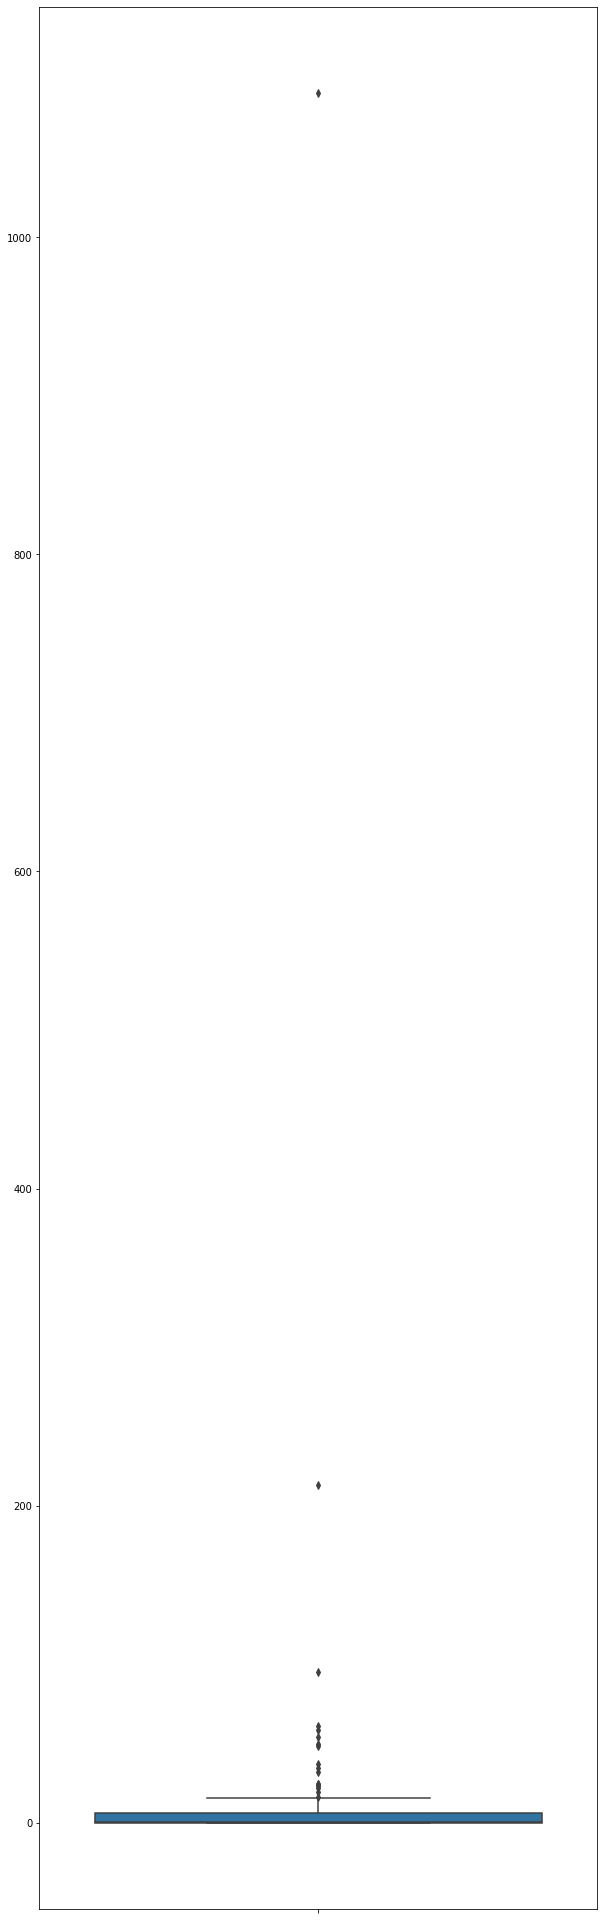

In [40]:
plt.figure(figsize=(10, 35))
sns.boxplot(y=y_test)

### Analysis of Results

By tuning a model we obtain a improvement from 23 to 17. Again, this still a bad result but our dataset present huge outliers as the boxplot graph above represents. Also we have a median less than 1 and a mean of 16. This is mostly due that 62 out 130 (48%) of our area data for the test is 0. I will try the same model next but removing these two outliers.

## 2. Using the dataset without outliers

In [48]:
data_cl = pd.read_csv('forestfires_no_outliers.csv')
data_cl.drop('Unnamed: 0', axis=1, inplace=True)
data_cl.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,4,5,1,1,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00
1,2,4,1,7,82.1,3.7,9.3,2.9,5.3,78,3.1,0.0,0.00
2,5,4,2,1,86.8,15.6,48.3,3.9,12.4,53,2.2,0.0,6.38
3,7,4,2,1,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,13.05
4,6,3,2,1,84.9,27.5,353.5,3.4,4.2,51,4.0,0.0,0.00


In [44]:
data_cl.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000
mean,4.660194,4.295146,7.471845,3.965049,90.633010,110.635922,547.401942,9.013010,18.860388,44.355340,4.015922,0.021748,9.329961
std,2.312853,1.229610,2.279302,2.143387,5.527184,63.980106,248.396286,4.563223,5.798962,16.313441,1.794712,0.296531,27.350635
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,65.450000,435.500000,6.450000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,4.000000,91.600000,108.300000,661.800000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,141.850000,713.900000,10.750000,22.800000,53.000000,4.900000,0.000000,6.490000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,278.530000


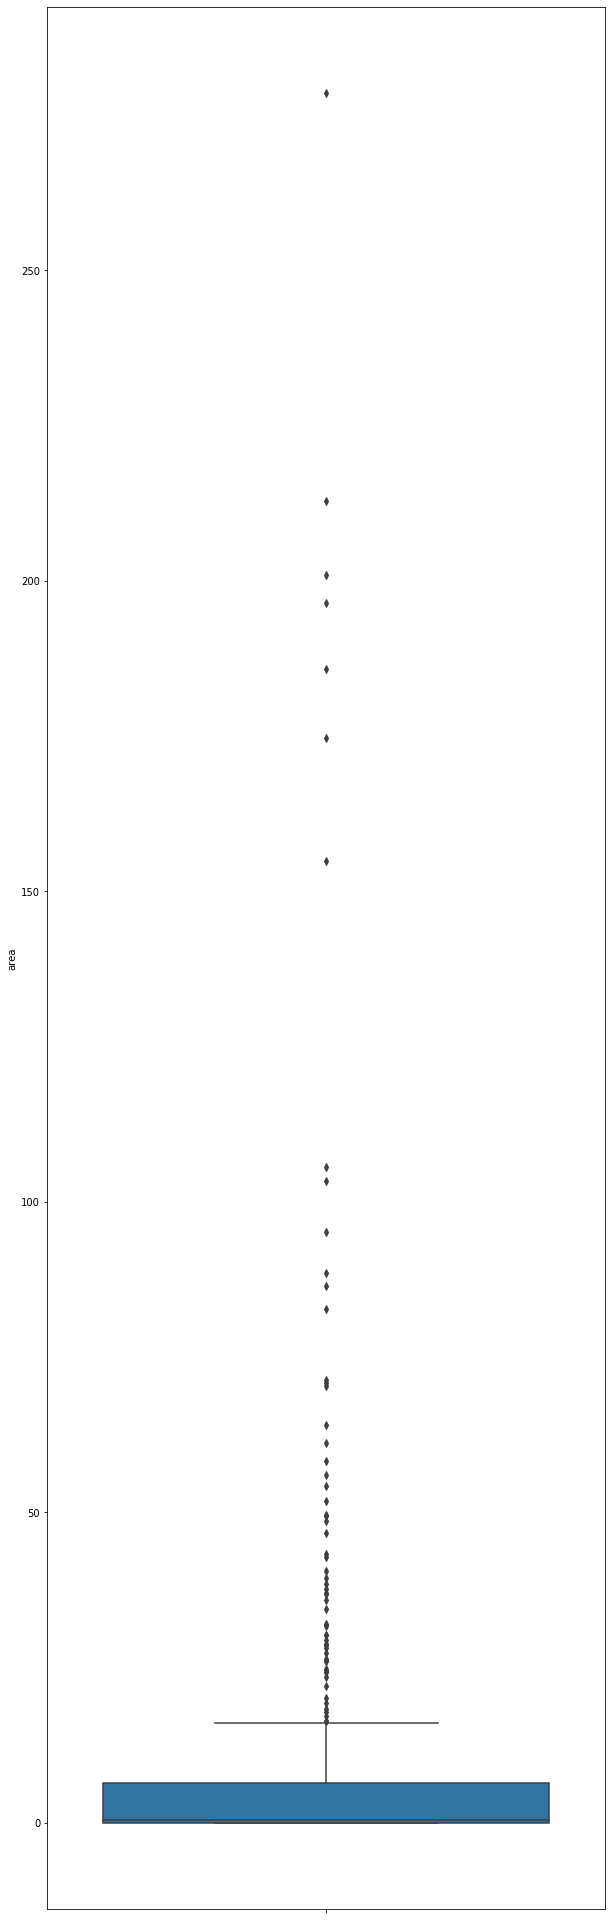

In [45]:
plt.figure(figsize=(10,35))
sns.boxplot(y=data_cl.area)

#### Analysis

As we can see, our target data is completely skewed. It includes many 0 values and therefore too many outliers. However, the two outliers that heavily affected the prior dataset were removed. Let's see the decision tree model effectiveness with this dataset 

### Modelling 

In [49]:
np.random.seed(42)

data_cl.drop(['ISI', 'wind', 'rain', 'day', 'X', 'Y'], axis=1, inplace=True)


X = data_cl.drop('area', axis=1)
y = data_cl['area']

X = cat_trans(X)

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scaling the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.fit_transform(y_test)

# Fitting the model
model.fit(X_train_scaled, y_train_scaled)

# Making predictions
pred = model.predict(X_test_scaled)

pred_u = scaler.inverse_transform(np.array(pred).reshape(-1, 1))
y_test_u = scaler.inverse_transform(np.array(y_test_scaled).reshape(-1, 1))
diff = np.array(pred_u) - np.array(y_test_u)
summary_diff = pd.DataFrame(np.concatenate((pred_u, y_test_u, diff), axis=1), columns=["Predictions", "Real", "Difference"])



print(
"R2 square: ", r2_score(y_test_scaled, pred), " Mean Absolute Error: ", mean_absolute_error(y_test_scaled, pred),
    " Mean Squared Error: ", mean_squared_error(y_test_scaled, pred), 
 )

R2 square:  -0.16591725342665886  Mean Absolute Error:  0.059507014662615446  Mean Squared Error:  0.02104397592148777


### Evaluating the unscaled prediction with the real label test:

In [50]:
r2_score(y_test, pred_u), mean_absolute_error(y_test, pred_u), mean_squared_error(y_test, pred_u)

(-0.16591725342665953, 5.663877655587739, 190.64226849276196)

In [51]:
summary_diff

,Predictions,Real,Difference
0,0.051258,1.38,-1.328742
1,0.000000,0.00,0.000000
2,0.000000,19.23,-19.230000
3,0.000000,10.13,-10.130000
4,0.000000,0.00,0.000000
...,...,...,...
124,0.000000,4.88,-4.880000
125,0.000000,0.00,0.000000
126,0.000000,0.00,0.000000
127,0.000000,0.00,0.000000


#### Analysis of the results

We have a considerable improvement with this dataset. We have a reduction of the MAE from 17 to 5. and a MSE improvement from 9716 to 190. Removing the two bigger outliers have a considerable impact in the model. I will proceed to tune this model to look for a higher effectiveness.

### Tuning the model

In [53]:
# Different Support Vector Regressor hyperparameter
rf_grid = {"criterion":["mse", "friedman_mse", "mae"],
          "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_samples_split":[2,3,4,5,6,7,8],
           "max_features":["auto", "sqrt", "log2"]

          }  # limiting the maximum to save time

# Instantiate RandomizedSearchCV model
tree_model = RandomizedSearchCV(model,
                              param_distributions=rf_grid,
                              n_iter = 100, 
                              cv=20,
                              verbose=True
                             )
# Fit the RandomizedSearchCV model
tree_model.fit(X_train_scaled, y_train_scaled)

#print(tree_model.best_params_)
tree_model.best_params_

Fitting 20 folds for each of 100 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   10.6s finished


{'min_samples_split': 7,
 'min_samples_leaf': 8,
 'max_features': 'sqrt',
 'criterion': 'mae'}

#### Trying the best model

In [80]:
np.random.seed(42)
model = DecisionTreeRegressor(min_samples_split=7, min_samples_leaf=8, max_features='sqrt', criterion='mae')
# Fitting the model
model.fit(X_train_scaled, y_train_scaled)

# Making predictions
pred = model.predict(X_test_scaled)

pred_u = scaler.inverse_transform(np.array(pred).reshape(-1, 1))
y_test_u = scaler.inverse_transform(np.array(y_test_scaled).reshape(-1, 1))
diff = np.array(pred_u) - np.array(y_test_u)
summary_diff = pd.DataFrame(np.concatenate((pred_u, y_test_u, diff), axis=1), columns=["Predictions", "Real", "Difference"])

r2_score(y_test, pred_u), mean_absolute_error(y_test, pred_u), mean_squared_error(y_test, pred_u)

(-0.165867284359422, 5.733825284849558, 190.6340979160725)

#### Result Analysis.

We don't get too much improvement by tuning the model. We have seen our area data has a lot of zeros referring to the case there is not forest fire. However, due this data is taking into consideration when building the model, and the MAE of our model is not the best possible, it is crucial that our model does not detect a possible fire of 10ha when the real area does not detect a fire. 

Because of this reason, we created a dataset that only covers when fire breaks, so using the model built upon this dataset we cannot whether will be a fire or not, but we can predict, once a fire break, how many ha of area can cover up given the different features.

## 3.Using the hazard data with outliers

In [85]:
data_aff = pd.read_csv('forest_fires_affected_areas.csv')
data_aff.drop('Unnamed: 0', axis=1, inplace=True)
model=DecisionTreeRegressor()
data_aff.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,5,4,2,1,86.8,15.6,48.3,3.9,12.4,53,2.2,0.0,6.38
1,7,4,2,1,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,13.05
2,4,5,2,1,85.0,9.0,56.9,3.5,10.1,62,1.8,0.0,51.78
3,7,4,2,2,84.7,9.5,58.3,4.1,7.5,71,6.3,0.0,9.96
4,6,5,2,3,75.1,4.4,16.2,1.9,4.6,82,6.3,0.0,5.39


In [82]:
data_aff.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,4.807407,4.366667,7.759259,3.955556,91.034074,114.707778,570.867037,9.177037,19.311111,43.733333,4.112963,0.028889,24.600185
std,2.383326,1.170740,2.115048,2.108107,3.709020,61.786520,229.981242,4.147350,6.179444,15.080059,1.884573,0.398392,86.501635
min,1.000000,2.000000,2.000000,1.000000,63.500000,3.200000,15.300000,0.800000,2.200000,15.000000,0.400000,0.000000,0.090000
25%,3.000000,4.000000,8.000000,2.000000,90.325000,82.900000,486.500000,6.800000,16.125000,33.000000,2.700000,0.000000,2.140000
50%,5.000000,4.000000,8.000000,4.000000,91.700000,111.700000,665.600000,8.400000,20.100000,41.000000,4.000000,0.000000,6.370000
75%,7.000000,5.000000,9.000000,6.000000,92.975000,141.300000,721.325000,11.375000,23.400000,53.000000,4.900000,0.000000,15.422500
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,22.700000,33.300000,96.000000,9.400000,6.400000,1090.840000


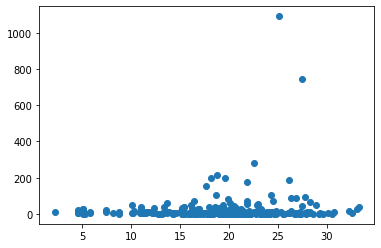

In [92]:
plt.scatter(data_aff.temp, data_aff.area)

In [86]:
np.random.seed(42)

data_aff.drop(['ISI', 'wind', 'rain', 'day', 'X', 'Y'], axis=1, inplace=True)


X = data_aff.drop('area', axis=1)
y = data_aff['area']

X = cat_trans(X)

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scaling the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.fit_transform(y_test)

# Fitting the model
model.fit(X_train_scaled, y_train_scaled)

# Making predictions
pred = model.predict(X_test_scaled)

# Unscalling the predictions
pred_u = scaler.inverse_transform(np.array(pred).reshape(-1, 1))
y_test_u = scaler.inverse_transform(np.array(y_test_scaled).reshape(-1, 1))
diff = np.array(pred_u) - np.array(y_test_u)
summary_diff = pd.DataFrame(np.concatenate((pred_u, y_test_u, diff), axis=1), columns=["Predictions", "Real", "Difference"])



print(
"R2 square: ", r2_score(y_test_scaled, pred), " Mean Absolute Error: ", mean_absolute_error(y_test_scaled, pred),
    " Mean Squared Error: ", mean_squared_error(y_test_scaled, pred), 
 )

R2 square:  -0.1789100347511059  Mean Absolute Error:  0.04228393725816216  Mean Squared Error:  0.017391267002116483


### Evaluating the model with the real data and unscaled pred

In [87]:
r2_score(y_test, pred_u), mean_absolute_error(y_test, pred_u), mean_squared_error(y_test, pred_u)

(-0.17891003475110567, 46.12120456434038, 20691.008829350736)

#### Analysis of results:

We can notice that the outliers have a heavy influence in the effectiveness of our model. Next we will remove these outliers and see how improve our model.

## 4. Using the hazard dataset without outliers

In [88]:
data_aff_cl = pd.read_csv('forestfires_affected_areas_no_outliers.csv')
data_aff_cl.drop('Unnamed: 0', axis=1, inplace=True)
data_aff_cl.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,5,4,2,1,86.8,15.6,48.3,3.9,12.4,53,2.2,0.0,6.38
1,7,4,2,1,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,13.05
2,4,5,2,1,85.0,9.0,56.9,3.5,10.1,62,1.8,0.0,51.78
3,7,4,2,2,84.7,9.5,58.3,4.1,7.5,71,6.3,0.0,9.96
4,6,5,2,3,75.1,4.4,16.2,1.9,4.6,82,6.3,0.0,5.39


In [90]:
data_aff_cl.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,4.791045,4.358209,7.753731,3.940299,91.014552,114.282090,570.004104,9.161567,19.258955,43.858209,4.110448,0.029104,17.928843
std,2.383070,1.170185,2.121538,2.106744,3.714610,61.663591,230.619948,4.152628,6.171885,15.066471,1.890991,0.399874,35.851567
min,1.000000,2.000000,2.000000,1.000000,63.500000,3.200000,15.300000,0.800000,2.200000,15.000000,0.400000,0.000000,0.090000
25%,2.750000,4.000000,8.000000,2.000000,90.300000,82.625000,480.800000,6.800000,16.100000,33.000000,2.700000,0.000000,2.137500
50%,5.000000,4.000000,8.000000,4.000000,91.650000,111.700000,665.450000,8.400000,20.100000,41.000000,4.000000,0.000000,6.330000
75%,7.000000,5.000000,9.000000,6.000000,92.925000,141.300000,721.400000,11.325000,23.325000,53.000000,4.900000,0.000000,14.845000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,22.700000,33.300000,96.000000,9.400000,6.400000,278.530000


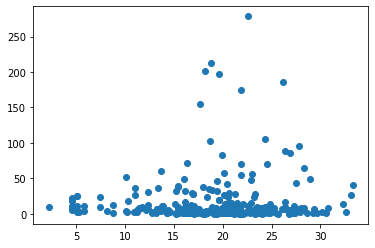

In [91]:
plt.scatter(data_aff_cl.temp,data_aff_cl.area)

In [93]:
np.random.seed(42)

data_aff_cl.drop(['ISI', 'wind', 'rain', 'day', 'X', 'Y'], axis=1, inplace=True)


X = data_aff_cl.drop('area', axis=1)
y = data_aff_cl['area']

X = cat_trans(X)

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scaling the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.fit_transform(y_test)

# Fitting the model
model.fit(X_train_scaled, y_train_scaled)

# Making predictions
pred = model.predict(X_test_scaled)

# Unscalling the predictions
pred_u = scaler.inverse_transform(np.array(pred).reshape(-1, 1))
y_test_u = scaler.inverse_transform(np.array(y_test_scaled).reshape(-1, 1))
diff = np.array(pred_u) - np.array(y_test_u)
summary_diff = pd.DataFrame(np.concatenate((pred_u, y_test_u, diff), axis=1), columns=["Predictions", "Real", "Difference"])



print(
"R2 square: ", r2_score(y_test_scaled, pred), " Mean Absolute Error: ", mean_absolute_error(y_test_scaled, pred),
    " Mean Squared Error: ", mean_squared_error(y_test_scaled, pred), 
 )

R2 square:  -0.308734602777345  Mean Absolute Error:  0.10633759473685093  Mean Squared Error:  0.05064666240932571


### Evaluating the model

In [94]:
r2_score(y_test, pred_u), mean_absolute_error(y_test, pred_u), mean_squared_error(y_test, pred_u)

(-0.30873460277734477, 19.74370121479111, 1745.9600638571994)

In [95]:
np.mean(y_test)

16.912686567164176

### Tuning the model

In [96]:
# Different Support Vector Regressor hyperparameter
rf_grid = {"criterion":["mse", "friedman_mse", "mae"],
          "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_samples_split":[2,3,4,5,6,7,8],
           "max_features":["auto", "sqrt", "log2"]

          }  # limiting the maximum to save time

# Instantiate RandomizedSearchCV model
tree_model = RandomizedSearchCV(model,
                              param_distributions=rf_grid,
                              n_iter = 100, 
                              cv=20,
                              verbose=True
                             )
# Fit the RandomizedSearchCV model
tree_model.fit(X_train_scaled, y_train_scaled)

#print(tree_model.best_params_)
tree_model.best_params_

Fitting 20 folds for each of 100 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   10.0s finished


{'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': 'log2',
 'criterion': 'mae'}

### Trying the tuned model

In [110]:
model = DecisionTreeRegressor(min_samples_split=5, min_samples_leaf=10, max_features='log2', criterion='mae')
np.random.seed(42)

# Fitting the model
model.fit(X_train_scaled, y_train_scaled)

# Making predictions
pred = model.predict(X_test_scaled)

pred_u = scaler.inverse_transform(np.array(pred).reshape(-1, 1))
y_test_u = scaler.inverse_transform(np.array(y_test_scaled).reshape(-1, 1))
diff = np.array(pred_u) - np.array(y_test_u)
summary_diff = pd.DataFrame(np.concatenate((pred_u, y_test_u, diff), axis=1), columns=["Predictions", "Real", "Difference"])

r2_score(y_test, pred_u), mean_absolute_error(y_test, pred_u), mean_squared_error(y_test, pred_u)

(-0.1035210929149557, 14.9356198029825, 1472.188290708283)

In [112]:
np.mean(y_test), np.median(y_test), np.max(y_test), np.min(y_test)

(16.912686567164176, 5.18, 185.76, 0.09)

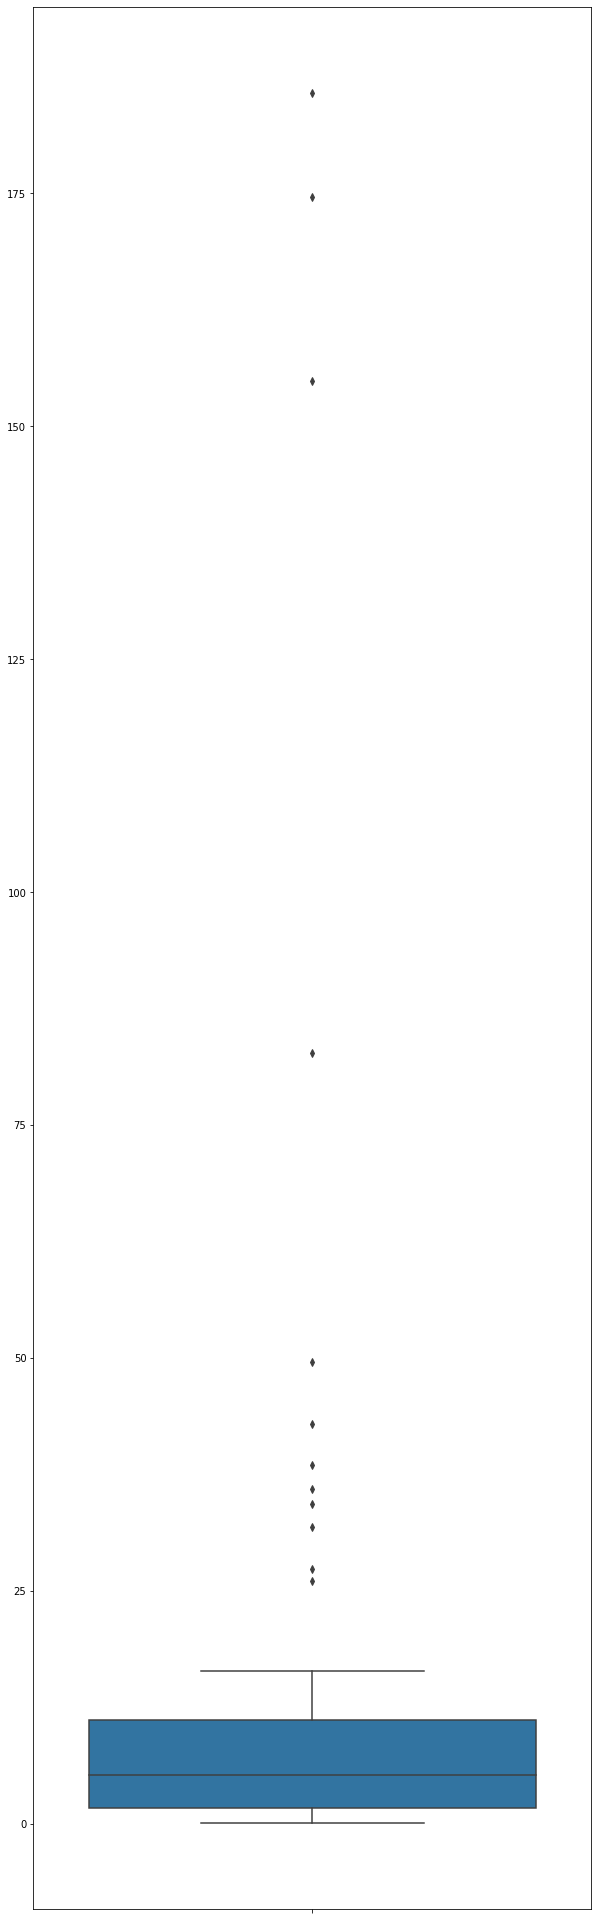

In [114]:
plt.figure(figsize=(10,35))
sns.boxplot(y=y_test)

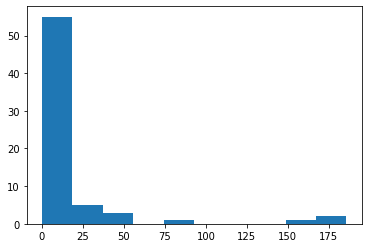

In [117]:
plt.hist(y_test);

(array([55.,  5.,  3.,  0.,  1.,  0.,  0.,  0.,  1.,  2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

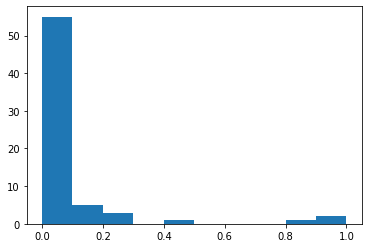

In [118]:
plt.hist(y_test_scaled)

### Analysis of Results

By tuning the model we get an improvement from 19 to 14. We have to take into account than different from when we had 0 values in our target dataset, the median of this dataset increases from 0.85 from the original dataset to 5.18 when we remove target values equal 0.

## Feature Importance

In [119]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                      "feature_importances": importances})
         .sort_values("feature_importances", ascending = False)
         .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()

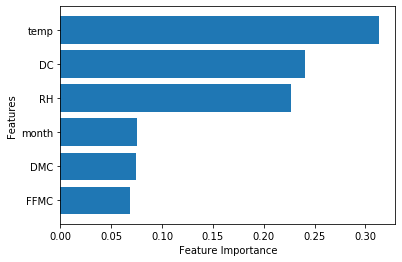

In [120]:
plot_features(X_train.columns, model.feature_importances_)

# Summary

Decision Tree regression model gives us better results than Support Vector Machines whether for our original dataset and the hazard dataset which only covers the data for burned area. I had to say that this data was skewed. In the research paper, to solve this issue they apply ln(x+1) to scale the target data.